### ML_Assignment

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Get training data
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [3]:
#Get test data
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [4]:
df = train_set.append(test_set)

In [5]:
#Display first 5 rows of dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'income']

In [7]:
#Set columns for data frame
df.columns = col_labels

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [10]:
df.income.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [11]:
df.income = df.income.map({' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1}).astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 5.8+ MB


In [13]:
categorical = df.dtypes[df.dtypes == 'object'].index
categorical

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [14]:
df.shape

(48842, 15)

In [15]:
df.replace(' ?', np.nan).dropna().shape

(45222, 15)

In [16]:
df = df.replace(' ?', np.nan).dropna()

In [17]:
df.shape

(45222, 15)

In [18]:
df.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


In [19]:
categorical = df.dtypes[df.dtypes == 'object'].index
categorical

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [20]:
def RemoveSpacePrefix(dataframe):
    for i in categorical:
        dataframe[i] = dataframe[i].str.strip()
    return dataframe

In [21]:
df1 = RemoveSpacePrefix(df)
df1.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [22]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [23]:
df.workclass = df.workclass.str.strip()

In [24]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [25]:
final_df = pd.get_dummies(df1)

In [26]:
X = final_df.drop('income', axis=1)

In [27]:
y = final_df.income

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [29]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()

In [30]:
model.fit(X_train,y_train,  eval_set = [(X_train,y_train),(X_test, y_test)], early_stopping_rounds=20)

[0]	validation_0-error:0.159027	validation_1-error:0.164885
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.158901	validation_1-error:0.163411
[2]	validation_0-error:0.158901	validation_1-error:0.163411
[3]	validation_0-error:0.158901	validation_1-error:0.163411
[4]	validation_0-error:0.15909	validation_1-error:0.164885
[5]	validation_0-error:0.157669	validation_1-error:0.163706
[6]	validation_0-error:0.157669	validation_1-error:0.163706
[7]	validation_0-error:0.157669	validation_1-error:0.163706
[8]	validation_0-error:0.157574	validation_1-error:0.16319
[9]	validation_0-error:0.158427	validation_1-error:0.162822
[10]	validation_0-error:0.157542	validation_1-error:0.163043
[11]	validation_0-error:0.15552	validation_1-error:0.159726
[12]	validation_0-error:0.155584	validation_1-error:0.159726
[13]	validation_0-error:0.155426	validation_1-error:0.15972

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
predicted = model.predict(X_test)

In [32]:
# Import metrics
from sklearn import metrics

metrics.accuracy_score(y_test, predicted)

0.8602491339279134

In [33]:
metrics.confusion_matrix(y_test, predicted)

array([[9613,  573],
       [1323, 2058]], dtype=int64)

In [34]:
metrics.classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.88      0.94      0.91     10186\n           1       0.78      0.61      0.68      3381\n\n   micro avg       0.86      0.86      0.86     13567\n   macro avg       0.83      0.78      0.80     13567\nweighted avg       0.85      0.86      0.85     13567\n'

In [35]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

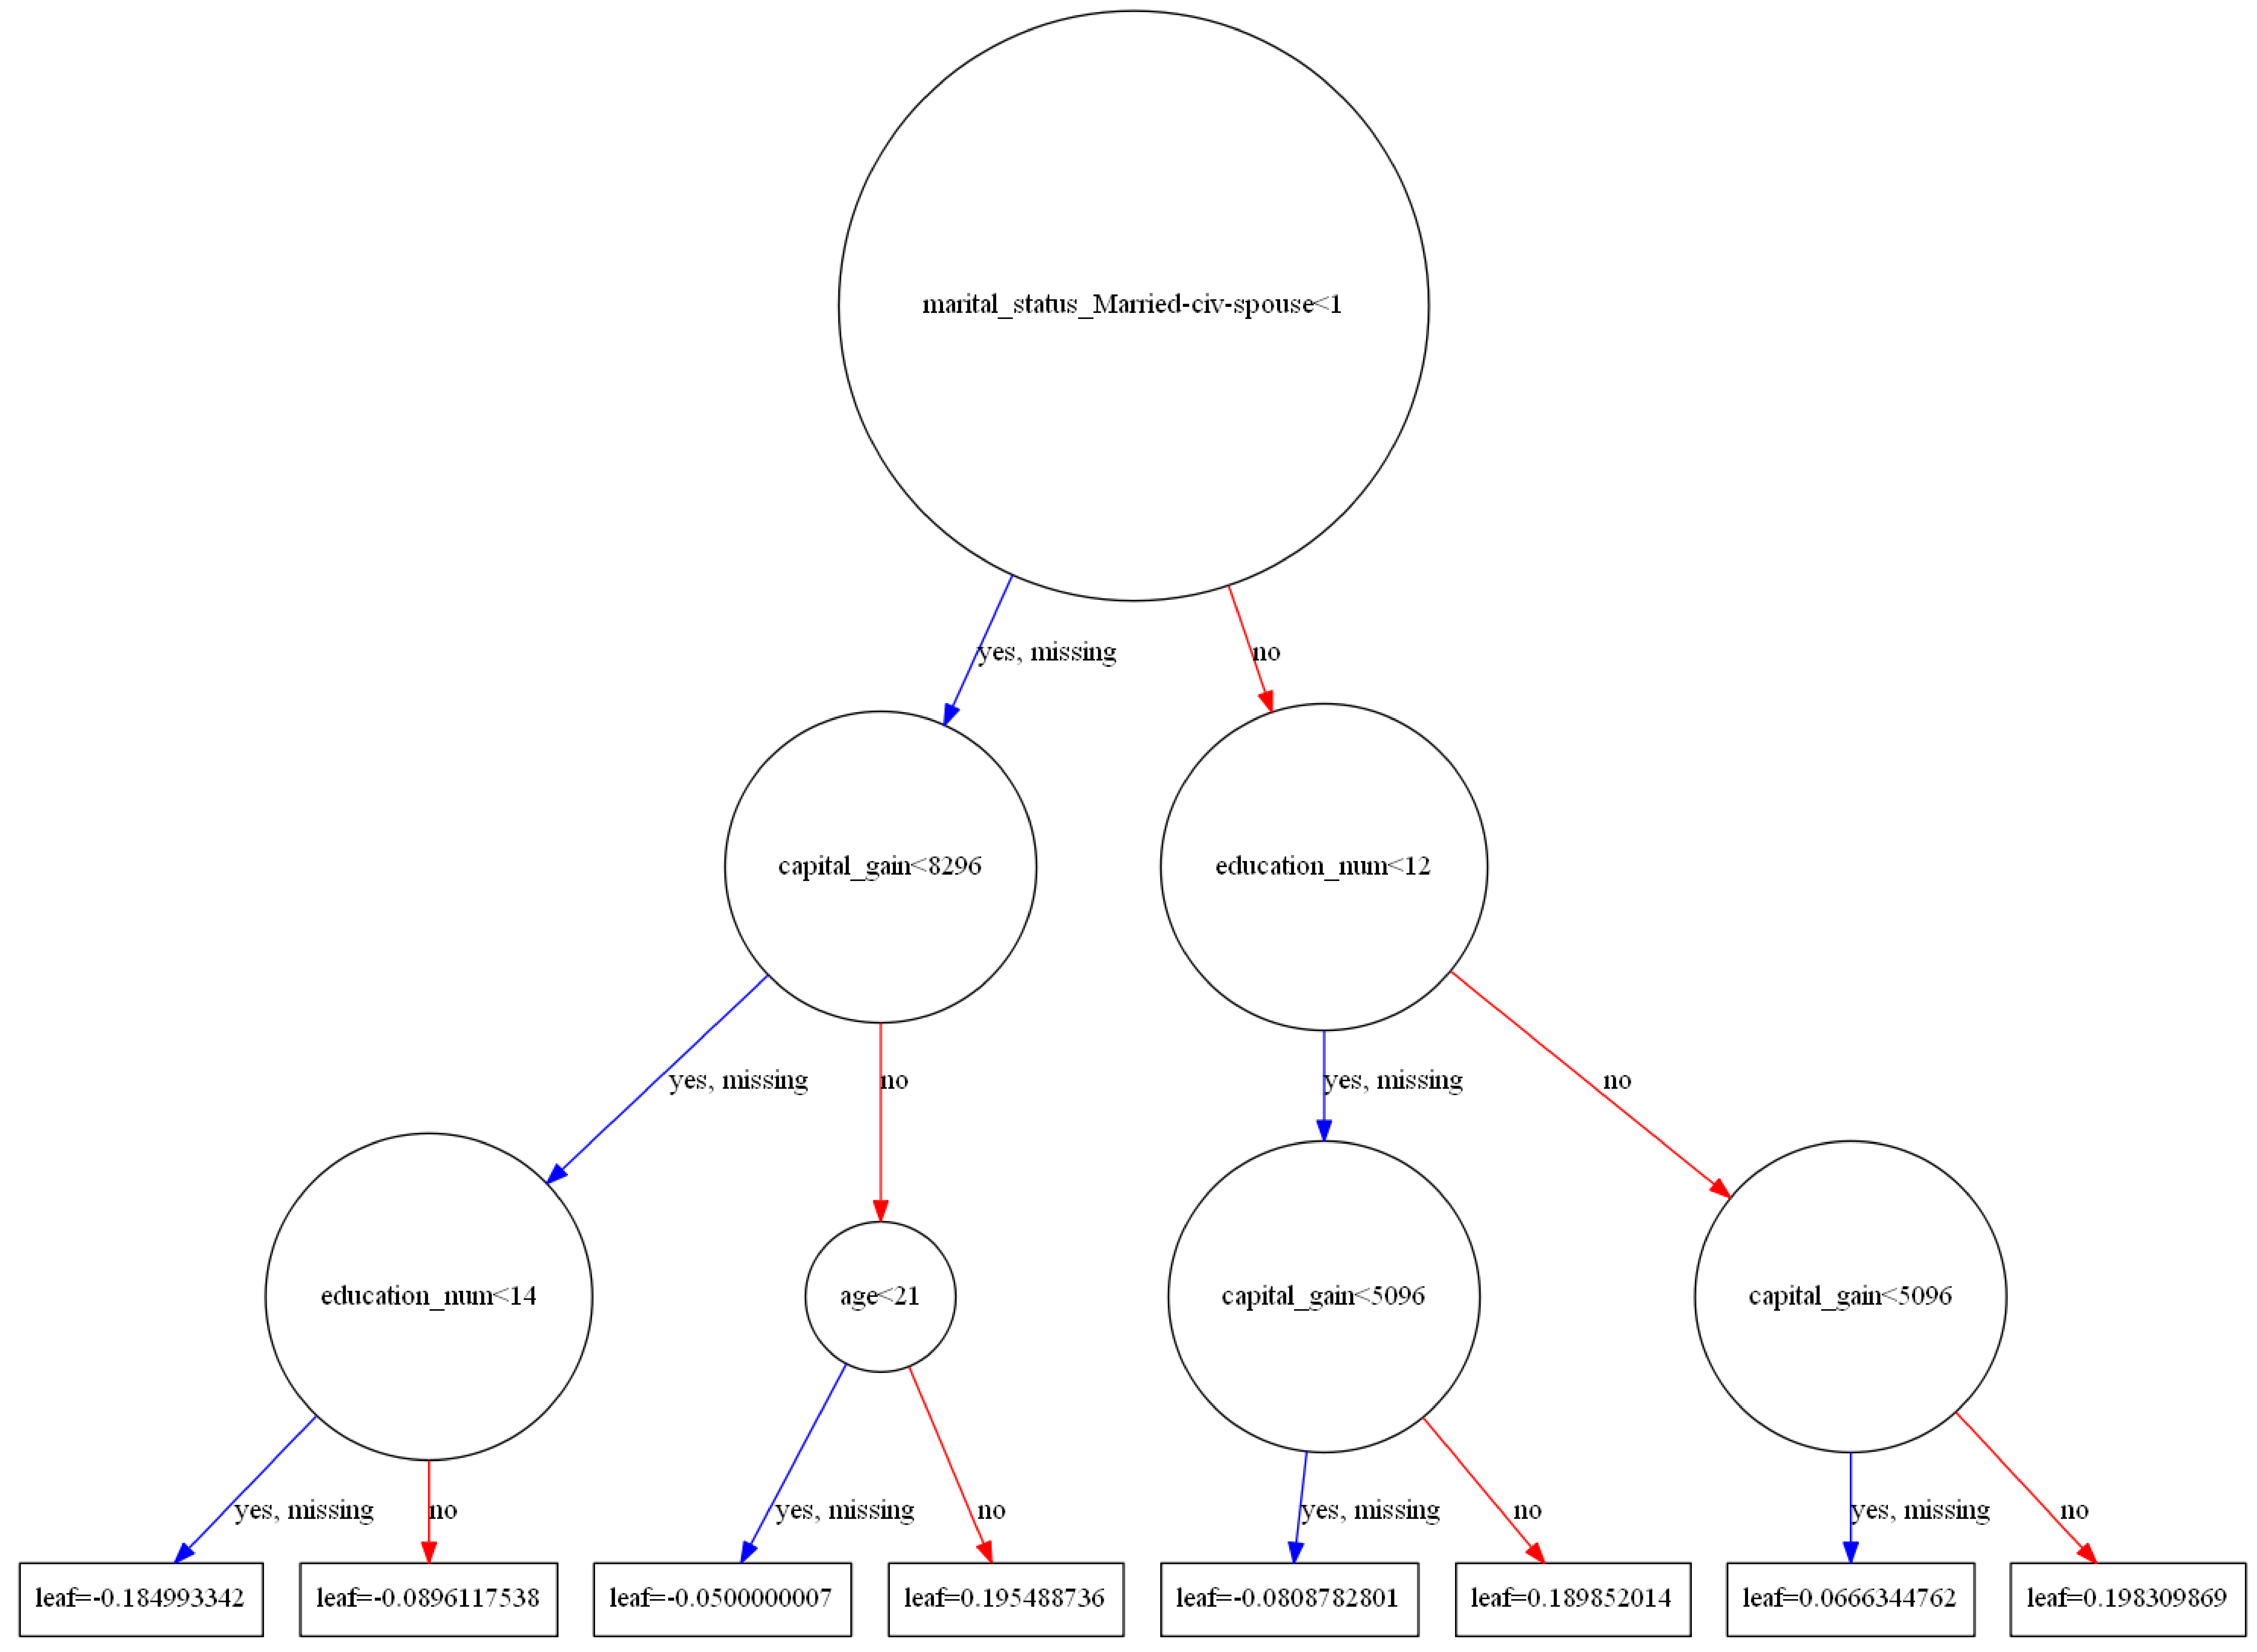

In [37]:
from xgboost import plot_tree
import graphviz
from matplotlib import pyplot as plt

plot_tree(model, num_trees = 0)
fig = plt.gcf()
fig.set_size_inches(300, 100)
fig.savefig('tree.png')